In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [13]:
df=pd.read_csv("D:/D.Desktop/Heart rate/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
df.shape

(299, 13)

In [16]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

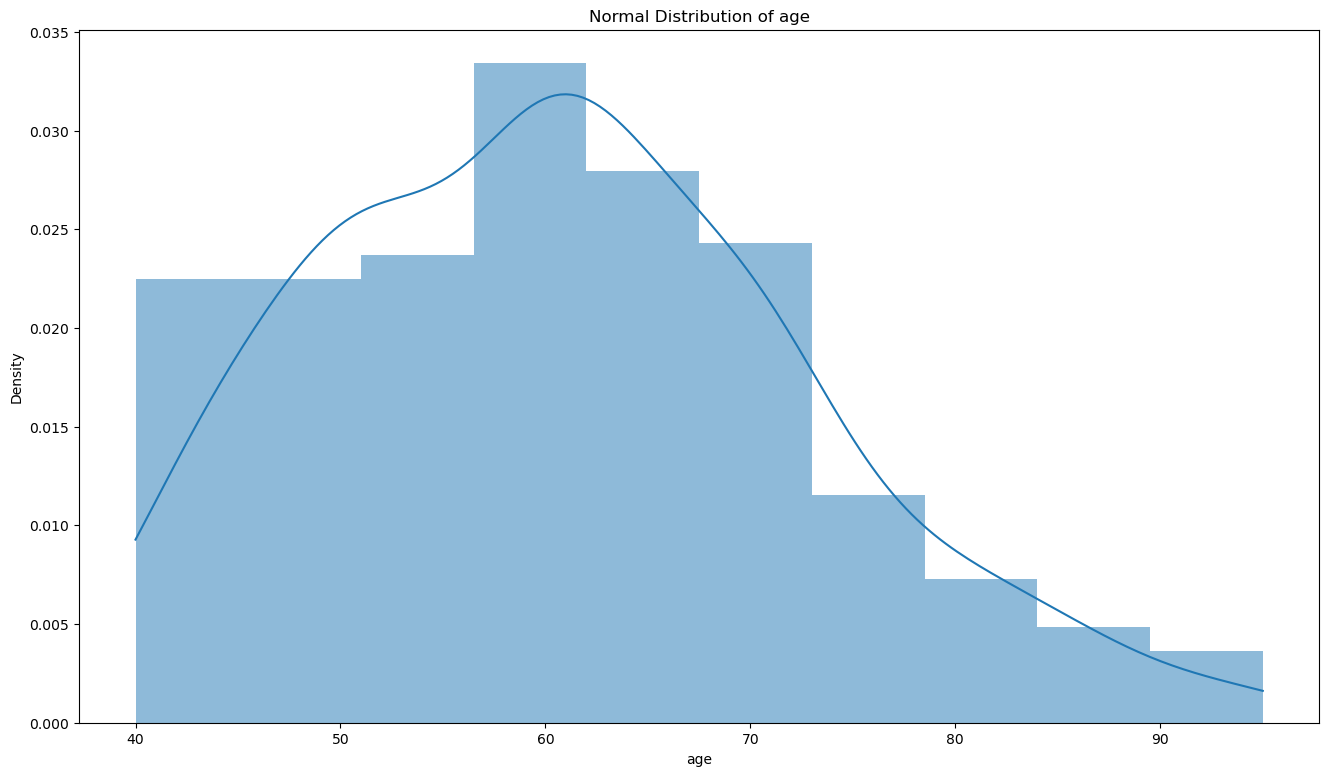

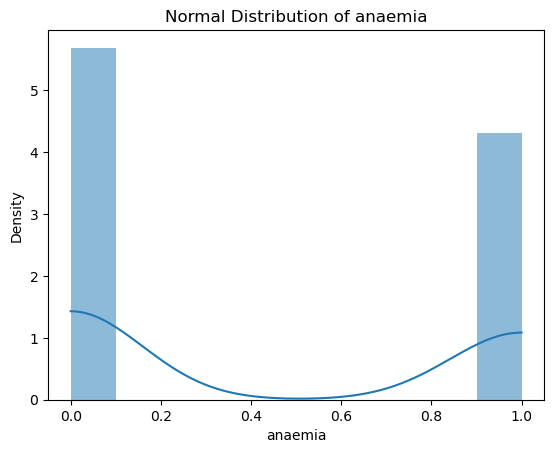

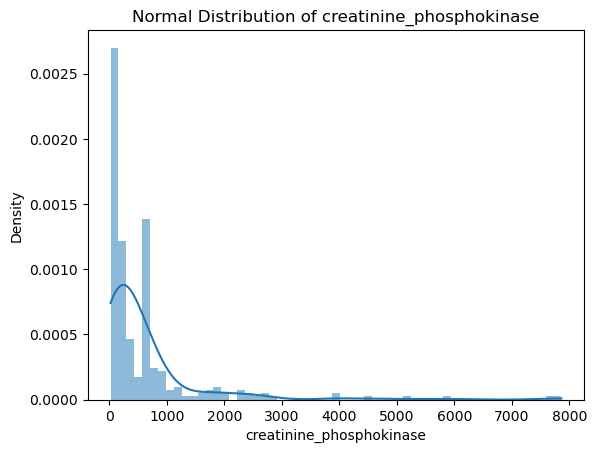

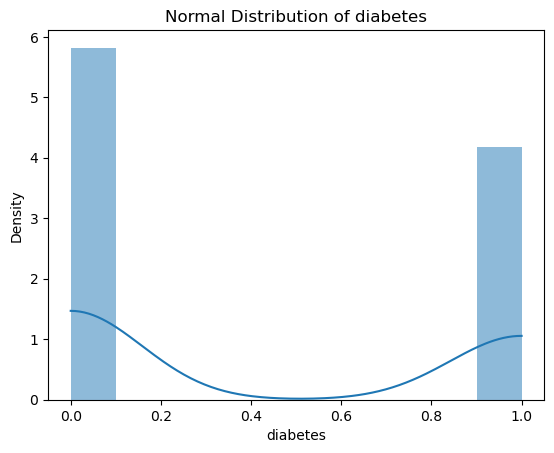

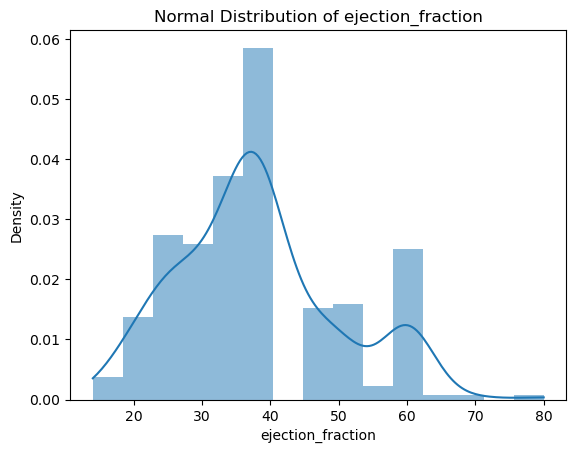

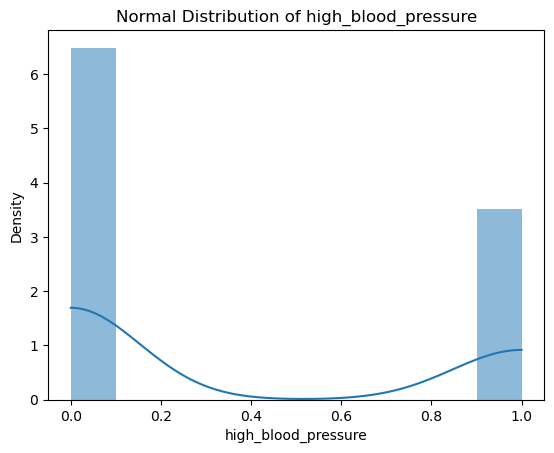

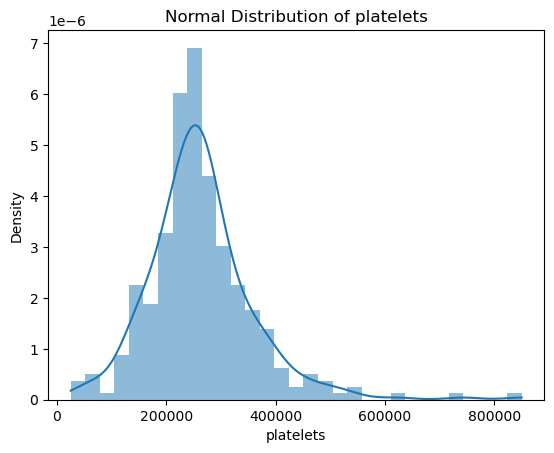

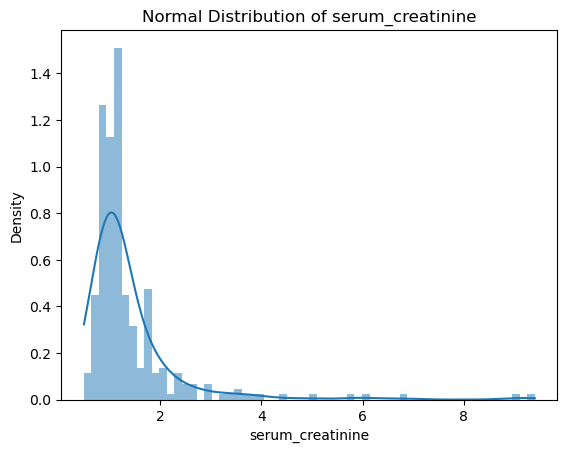

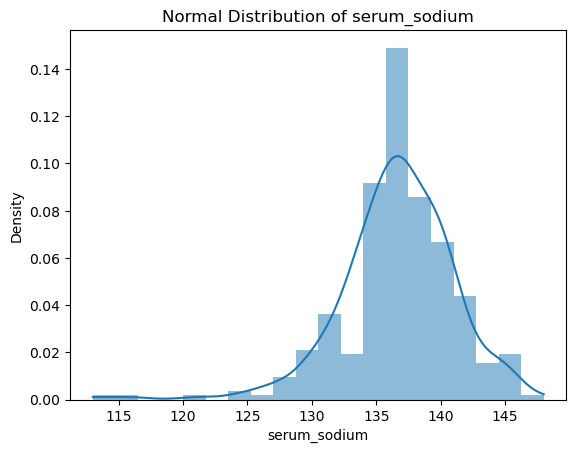

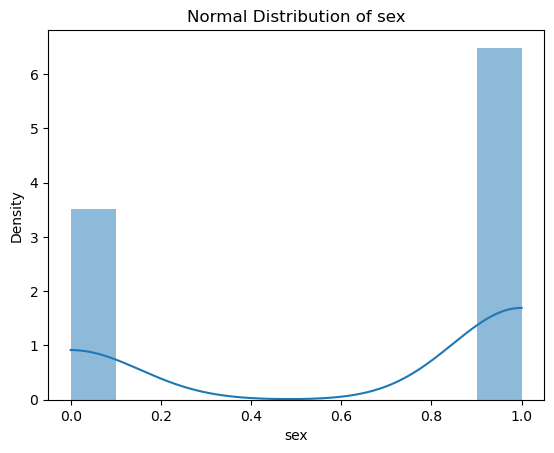

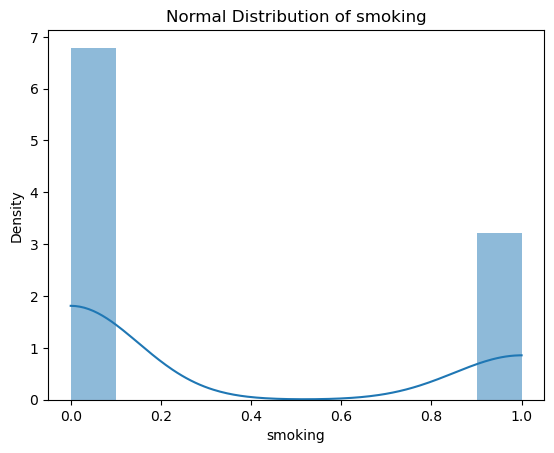

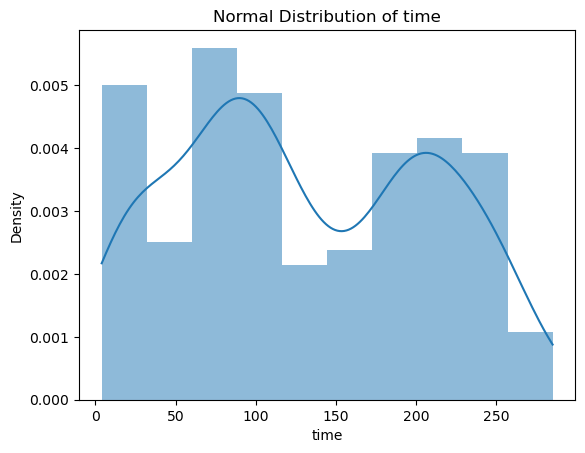

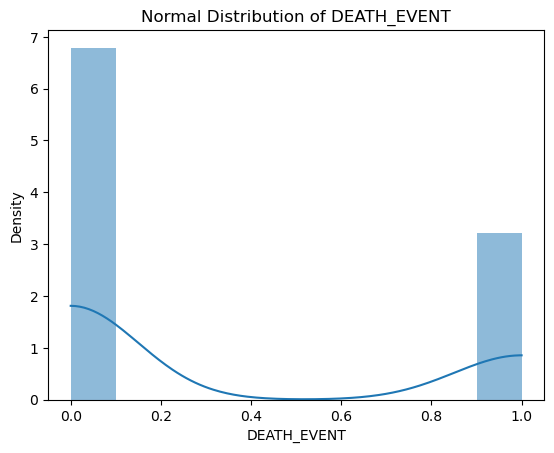

In [20]:
plt.figure(figsize=(16, 9))
for column in df.select_dtypes(include=['float64', 'int64']):
    sns.histplot(df[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Normal Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

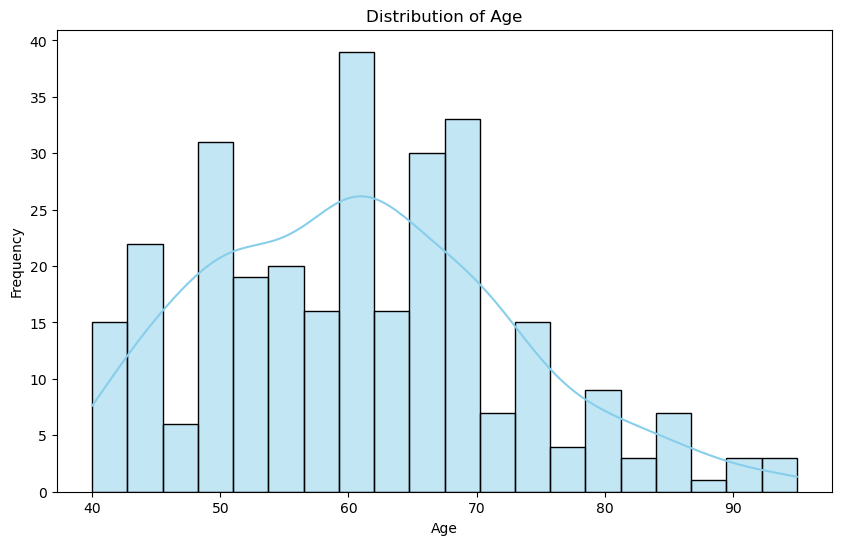

In [23]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

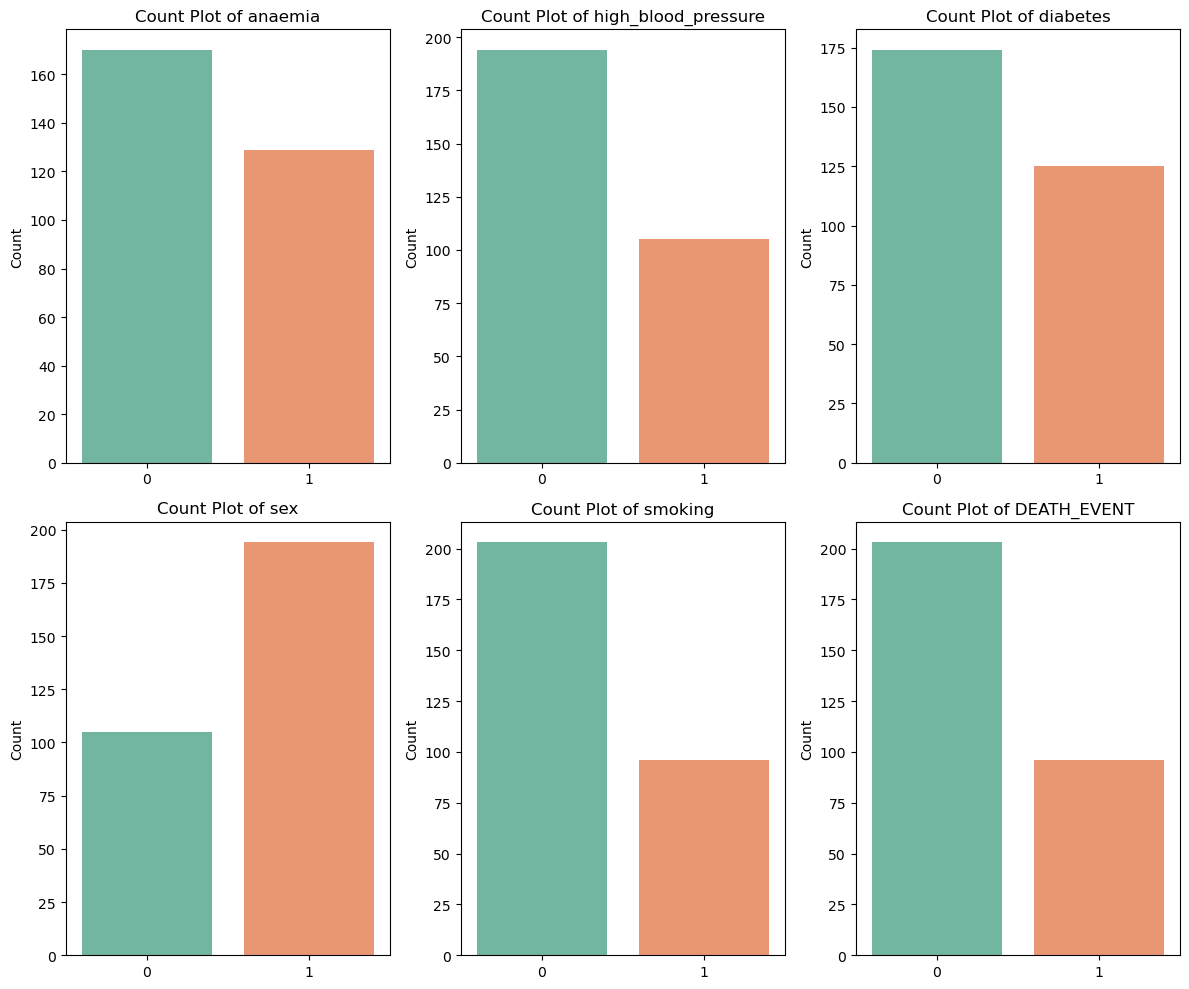

In [24]:
# Count plot of binary features
binary_features = ['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'DEATH_EVENT']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [35]:
sns.set(style="whitegrid")

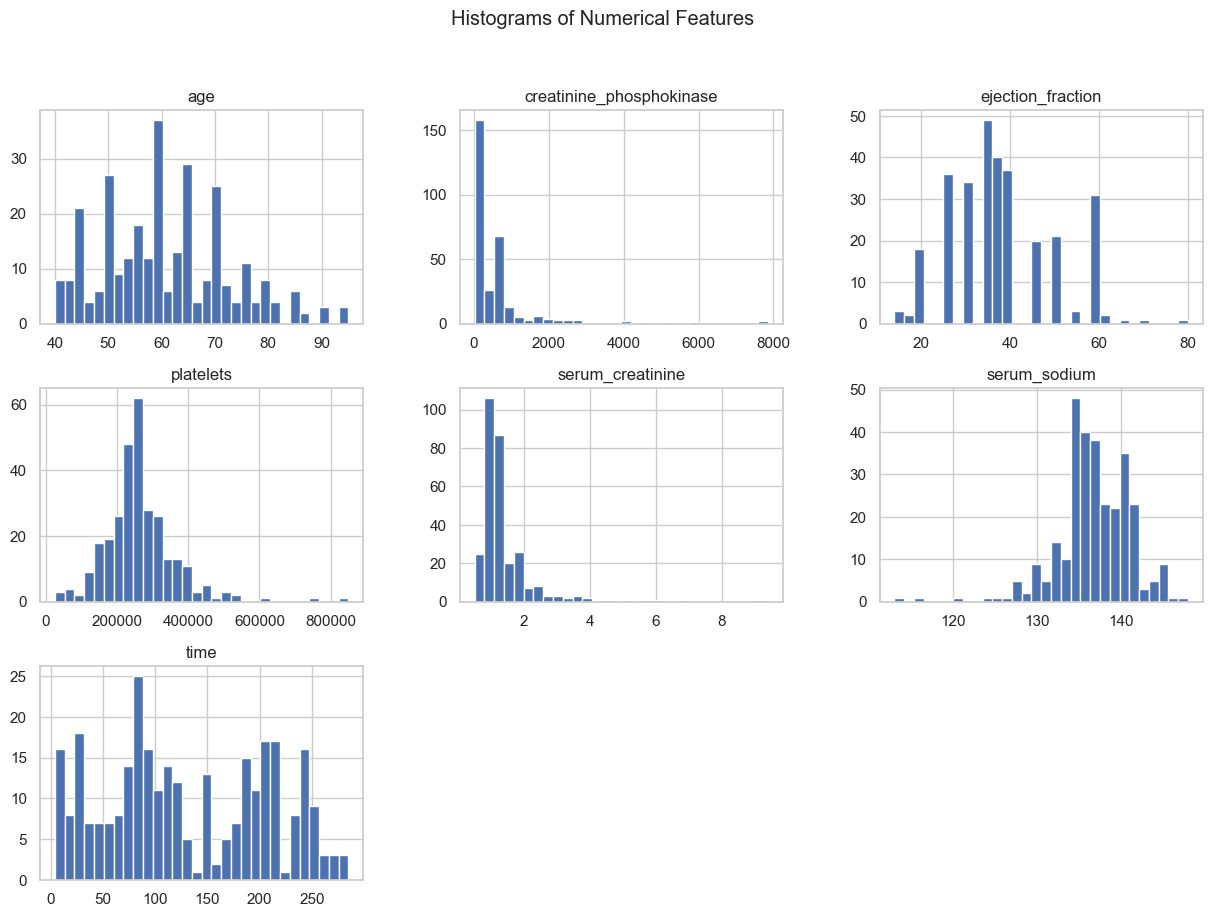

In [36]:
# 1. Histograms for numerical features
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
df[numeric_features].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

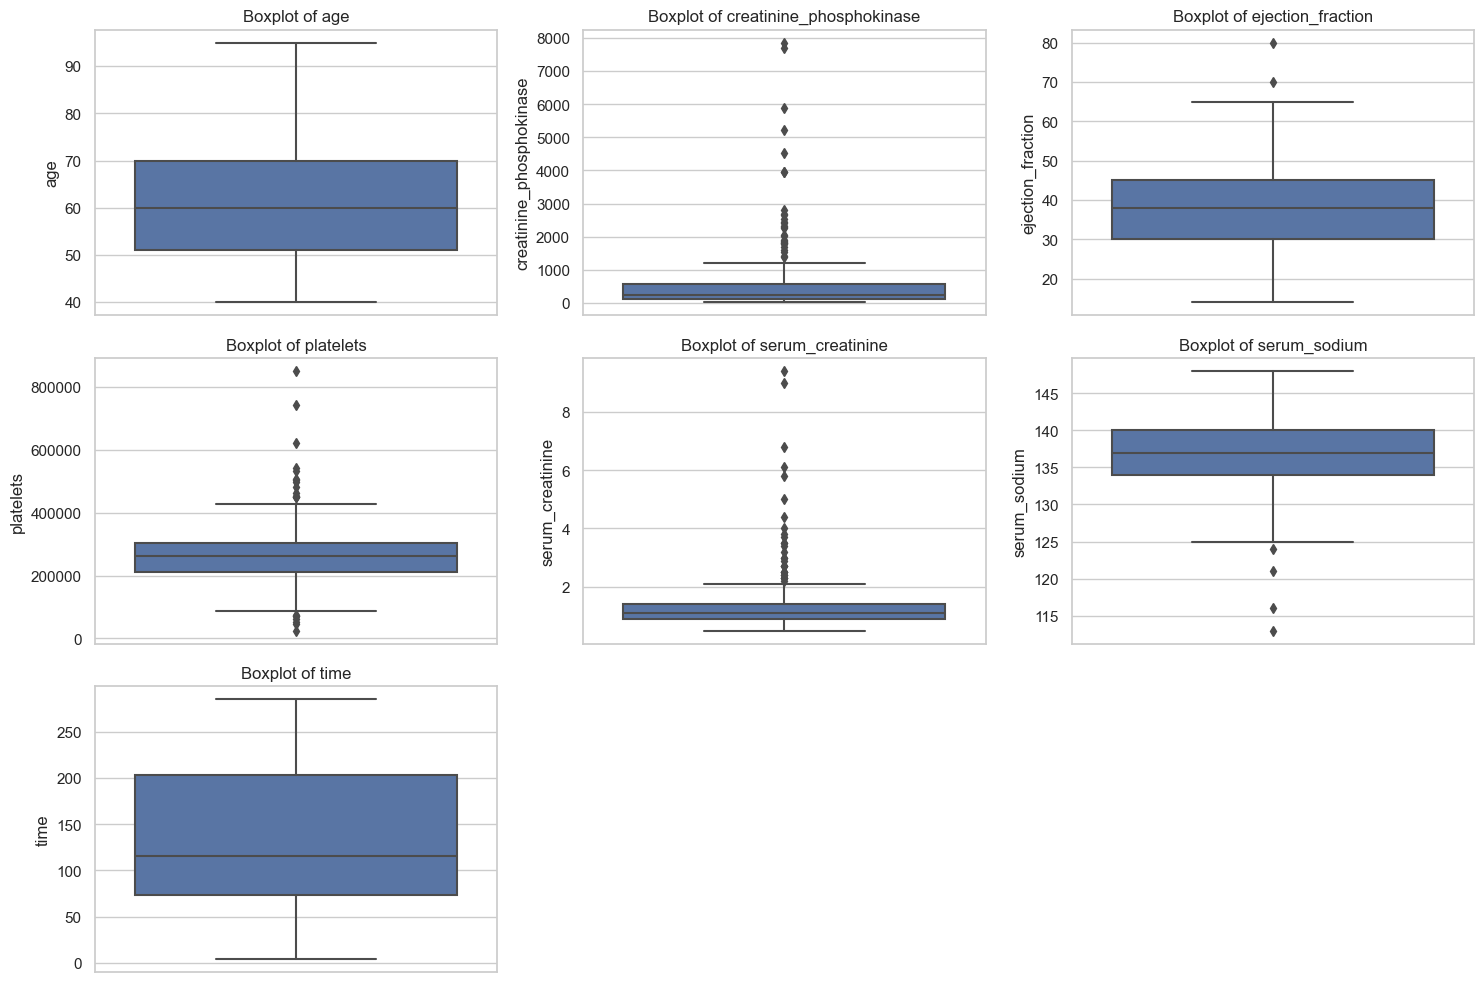

In [37]:
# 2. Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


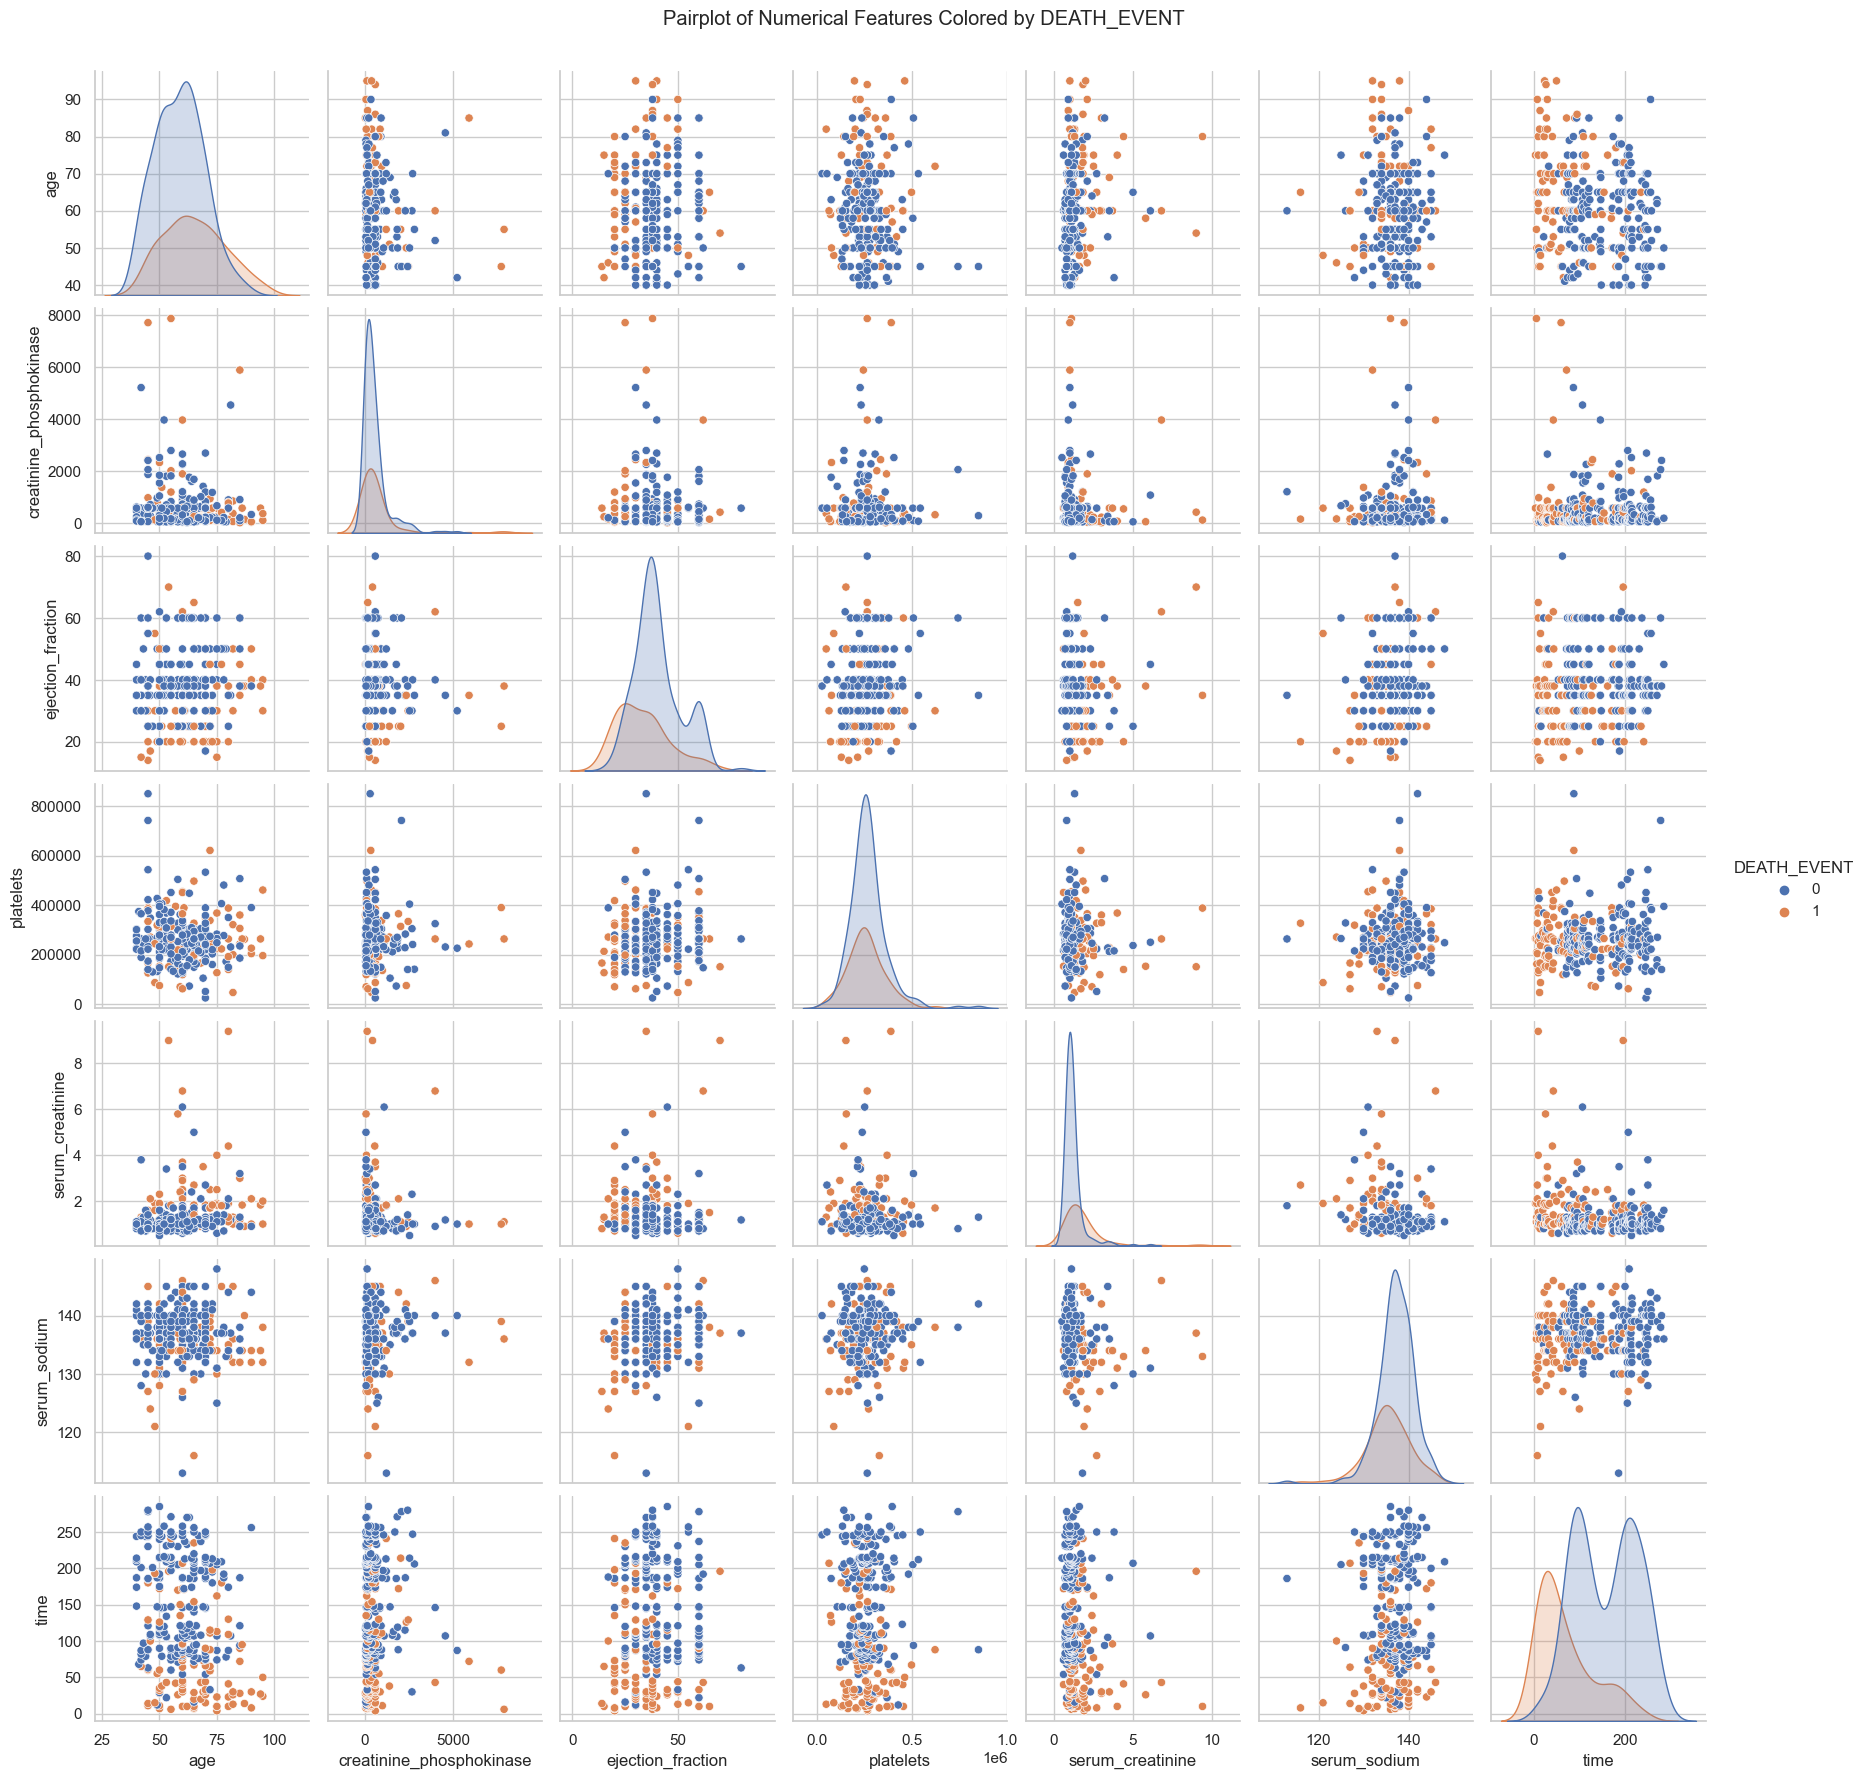

In [39]:
# 5. Pairplots
sns.pairplot(df[numeric_features + ['DEATH_EVENT']], hue='DEATH_EVENT', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features Colored by DEATH_EVENT', y=1.02)
plt.show()


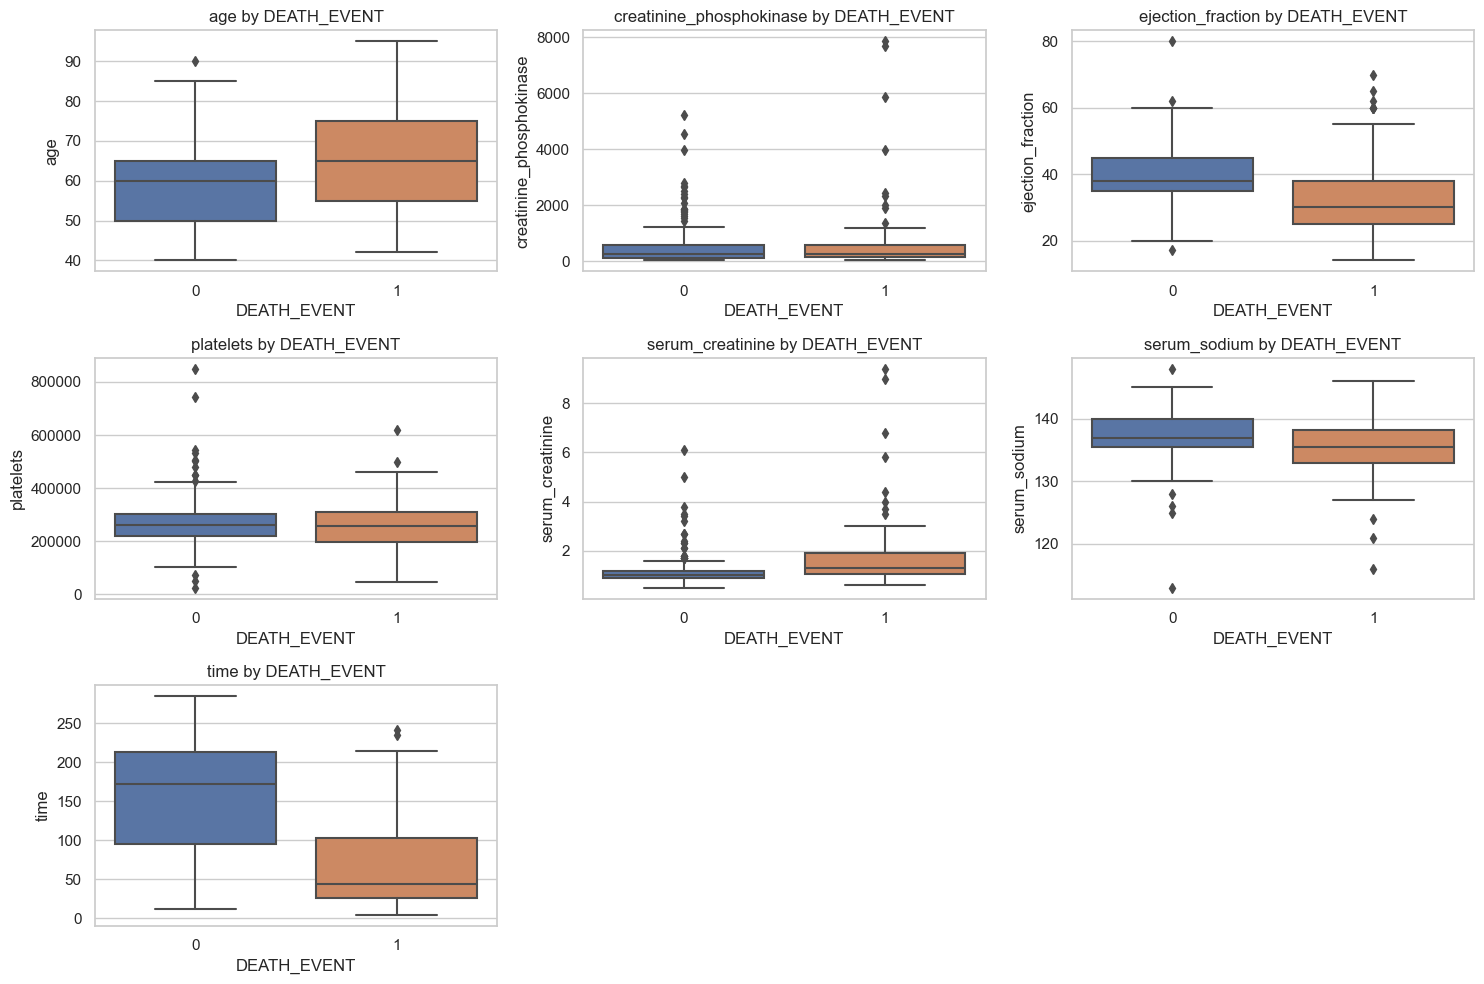

In [40]:
# 6. Feature-Target Relationships
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='DEATH_EVENT', y=column)
    plt.title(f'{column} by DEATH_EVENT')
plt.tight_layout()
plt.show()

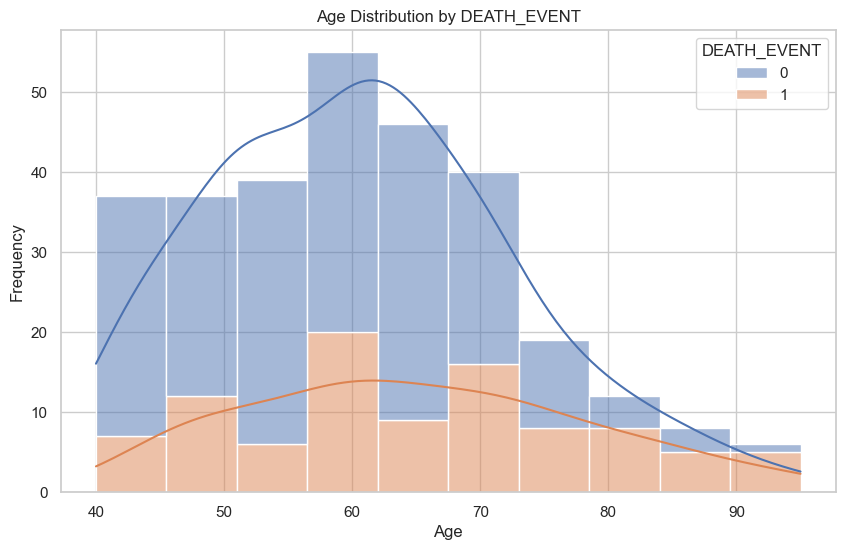

In [41]:
# Additional plots to analyze specific relationships
# Age vs Death Event
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True, multiple='stack')
plt.title('Age Distribution by DEATH_EVENT')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

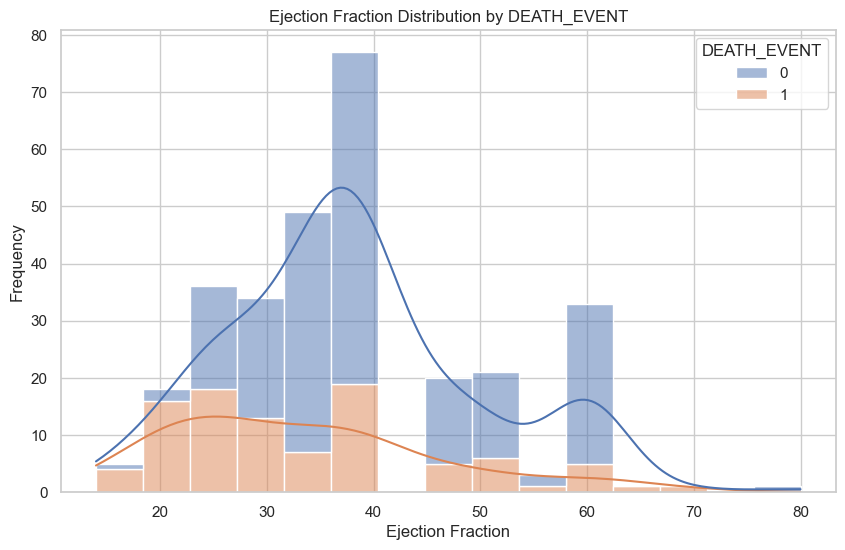

In [42]:
# Ejection Fraction vs Death Event
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', kde=True, multiple='stack')
plt.title('Ejection Fraction Distribution by DEATH_EVENT')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.show()

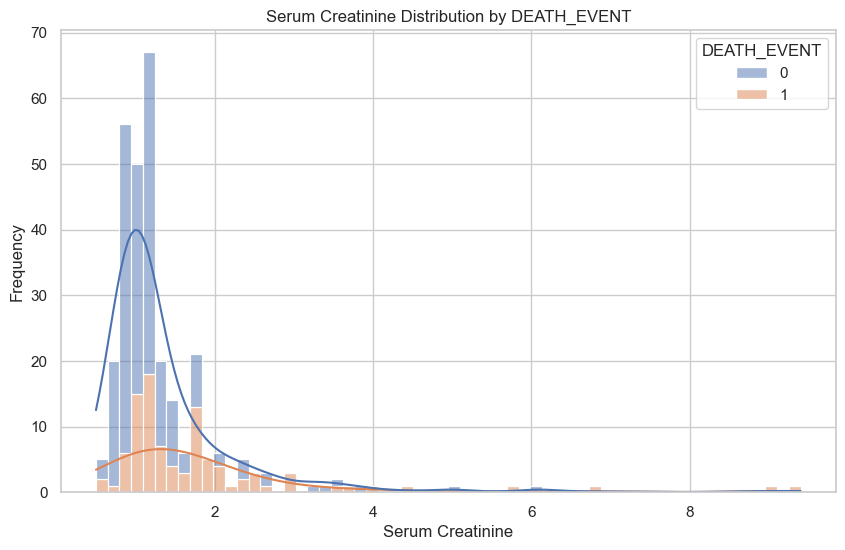

In [43]:
# Serum Creatinine vs Death Event
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', kde=True, multiple='stack')
plt.title('Serum Creatinine Distribution by DEATH_EVENT')
plt.xlabel('Serum Creatinine')
plt.ylabel('Frequency')
plt.show()

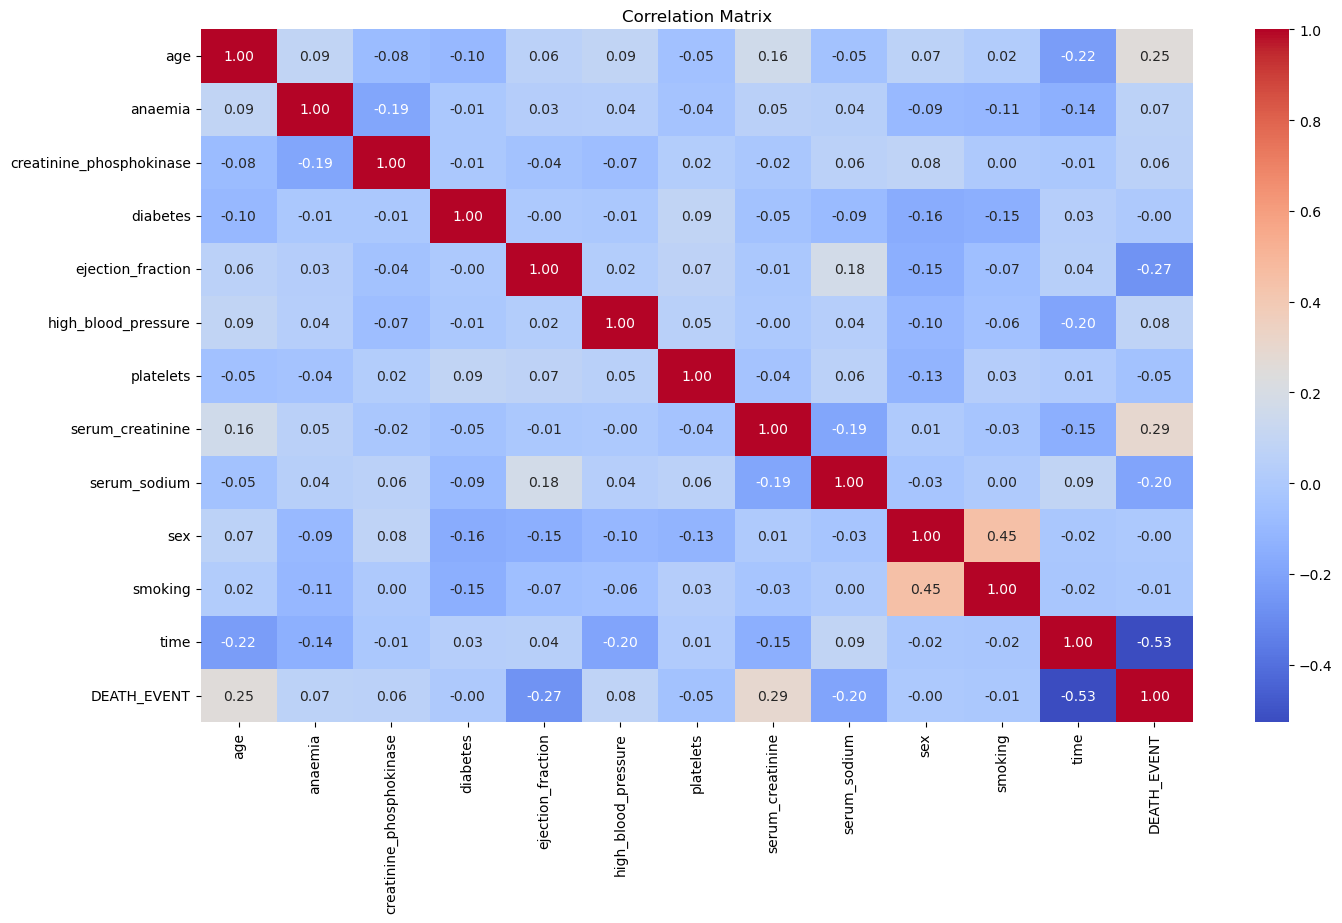

In [25]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [29]:
# !pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 991.0 kB/s eta 0:01:43
   ---------------------------------------- 0.1/101.1 MB 1.2 MB/s eta 0:01:26
   ---------------------------------------- 0.1/101.1 MB 983.0 kB/s eta 0:01:43
   ---------------------------------------- 0.3/101.1 MB 1.4 MB/s eta 0:01:11
   ---------------------------------------- 0.3/101.1 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.3/101.1 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0

In [30]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

### Dependent Variable (Target):
DEATH_EVENT: This should be your dependent variable. It indicates whether the patient survived (0) or not (1).

In [31]:
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

#### Feature Encoding:
- Since CatBoost can handle categorical features, you don't need to perform one-hot encoding or label encoding explicitly. CatBoost can directly handle categorical features.

In [45]:
## Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using CatBoost Classifier
Initialize CatBoostClassifier

In [47]:
model = CatBoostClassifier()

### Train the model

In [48]:
model.fit(X_train, y_train)

Learning rate set to 0.005591
0:	learn: 0.6889046	total: 300ms	remaining: 4m 59s
1:	learn: 0.6838178	total: 306ms	remaining: 2m 32s
2:	learn: 0.6786250	total: 311ms	remaining: 1m 43s
3:	learn: 0.6732183	total: 317ms	remaining: 1m 18s
4:	learn: 0.6678121	total: 322ms	remaining: 1m 4s
5:	learn: 0.6610990	total: 327ms	remaining: 54.1s
6:	learn: 0.6566123	total: 333ms	remaining: 47.2s
7:	learn: 0.6522174	total: 338ms	remaining: 42s
8:	learn: 0.6473595	total: 344ms	remaining: 37.8s
9:	learn: 0.6431268	total: 349ms	remaining: 34.5s
10:	learn: 0.6390173	total: 353ms	remaining: 31.8s
11:	learn: 0.6341996	total: 358ms	remaining: 29.5s
12:	learn: 0.6301566	total: 363ms	remaining: 27.6s
13:	learn: 0.6256938	total: 367ms	remaining: 25.9s
14:	learn: 0.6221978	total: 373ms	remaining: 24.5s
15:	learn: 0.6177628	total: 377ms	remaining: 23.2s
16:	learn: 0.6134280	total: 382ms	remaining: 22.1s
17:	learn: 0.6091774	total: 388ms	remaining: 21.1s
18:	learn: 0.6048550	total: 393ms	remaining: 20.3s
19:	learn

In [49]:
y_pred = model.predict(X_test)

### Evaluation

In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7166666666666667
Precision: 0.7857142857142857
Recall: 0.44


### Visualizing Model Traing Result
Plot ROC curve

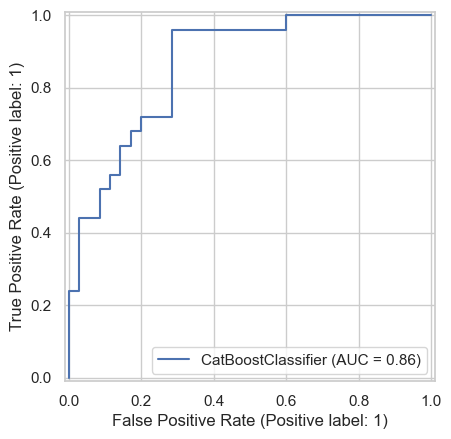

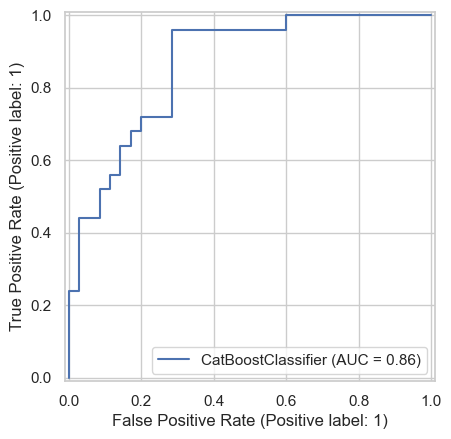

In [51]:
# from sklearn.metrics import plot_roc_curve
# plot_roc_curve(model, X_test, y_test)
# plt.show()

from sklearn.metrics import RocCurveDisplay

roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)

# Show the ROC curve
roc_display.plot()

### Plot confusion matrix

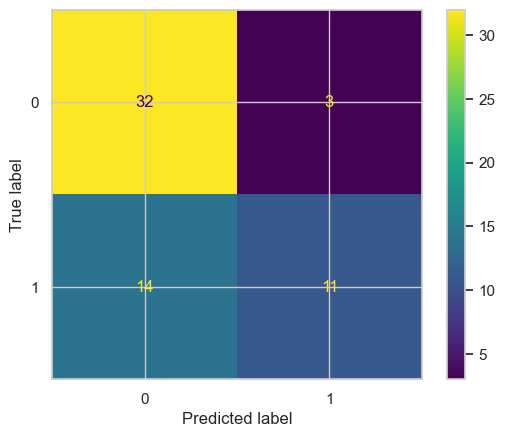

In [52]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

#### Save the model

In [53]:
joblib.dump(model, 'catboost_model.pkl')


['catboost_model.pkl']

### Load the model

In [54]:
loaded_model = joblib.load('catboost_model.pkl')

### Sample Data for prediction

In [55]:
import pandas as pd

# Assuming loaded_model is already loaded with your model

# Creating new data
new_data = pd.DataFrame({
    'age': [60],
    'anaemia': [1],
    'creatinine_phosphokinase': [300],
    'diabetes': [0],
    'ejection_fraction': [25],
    'high_blood_pressure': [1],
    'platelets': [250000],
    'serum_creatinine': [1.2],
    'serum_sodium': [135],
    'sex': [0],
    'smoking': [1],
    'time': [10]
})

# Making predictions
predictions = loaded_model.predict(new_data)
predictions

array([1], dtype=int64)

### Conclusions

### Based on the analysis and model evaluation:

### Model Performance:
The CatBoostClassifier achieved certain accuracy, precision, and recall scores on the test dataset, indicating its performance in predicting the survival of patients with heart failure.
The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (true negative rate).
The confusion matrix provides insight into the model's performance in terms of true positives, true negatives, false positives, and false negatives.

### Evaluation Metrics:
Accuracy: Indicates the overall correctness of the model's predictions.
Precision: Measures the proportion of true positive predictions among all positive predictions. It's relevant when the cost of false positives is high.
Recall: Measures the proportion of true positive predictions among all actual positive instances. -- It's relevant when the cost of false negatives is high.

### Model Deployment:
The model has been successfully trained and saved for deployment. It can be deployed in production to predict the survival of patients with heart failure using new data.

### Sample Prediction:
Using a sample of new data, the model can make predictions on whether a patient is likely to survive or not based on their attributes.

### Further Improvements:
Depending on the application and specific requirements, the model can be further fine-tuned or optimized to improve its performance.
Collecting more diverse and extensive data could enhance the model's predictive power and generalization ability.